In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import scipy.signal
import math
import cv2
import matplotlib.pyplot as plt
import random

# Task #01

In [2]:
img1=cv2.imread('./task1/dataset/arfa1.JPG')
img2=cv2.imread('./task1/dataset/arfa2.JPG')
img3=cv2.imread('./task1/dataset/mecca1.JPG')
img4=cv2.imread('./task1/dataset/mecca2.JPG')
img5=cv2.imread('./task1/dataset/station1.PNG')
img6=cv2.imread('./task1/dataset/station2.PNG')

In [3]:
resize1=cv2.resize(img1,(200,200),3)
resize2=cv2.resize(img2,(200,200),3)
resize3=cv2.resize(img3,(200,200),3)
resize4=cv2.resize(img4,(200,200),3)
resize5=cv2.resize(img5,(200,200),3)
resize6=cv2.resize(img6,(200,200),3)
g_img1=cv2.cvtColor(resize1,cv2.COLOR_RGB2GRAY)
g_img2=cv2.cvtColor(resize2,cv2.COLOR_RGB2GRAY)
g_img3=cv2.cvtColor(resize3,cv2.COLOR_RGB2GRAY)
g_img4=cv2.cvtColor(resize4,cv2.COLOR_RGB2GRAY)
g_img5=cv2.cvtColor(resize5,cv2.COLOR_RGB2GRAY)
g_img6=cv2.cvtColor(resize6,cv2.COLOR_RGB2GRAY)

In [4]:
def correspondence_images(image):
    Img_corrx=[]
    Img_corry=[]
    def click_event(event, x, y, flags, params):
        if event==cv2.EVENT_RBUTTONDOWN: 
            print('x:',x, 'y:', y) 
            Img_corrx.append(x)
            Img_corry.append(y)
            font = cv2.FONT_HERSHEY_SIMPLEX 
            #imS = cv2.resize(image, (200, 200)) 
            #cv2.putText(image, str(x) + ',' + str(y), (x,y), font,   1, (255, 0, 0), 2)
            cv2.imshow('image', image) 
  
  
    #imS = cv2.resize(image, (200, 200)) 
    cv2.imshow('image', image) 
    cv2.setMouseCallback('image', click_event) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows()
    return Img_corrx,Img_corry

#x,y=correspondence_images(g_img1)


x: 2 y: 2
x: 196 y: 2
x: 2 y: 197
x: 197 y: 197
x: 80 y: 3
x: 196 y: 118
x: 3 y: 80
x: 116 y: 192
Matrix [[  0.8398268   0.8398268 -67.70563  ]
 [ -1.2607522   1.2717153  99.04504  ]]
Mean Square Error pixel 89.55545
Mean square of corresponding points 2592.5


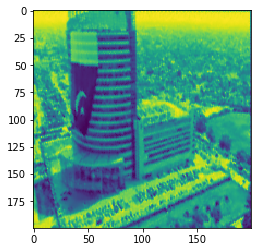

In [7]:
def Recover_Transformation(img1,img2):
    x1,y1=correspondence_images(img1)
    x2,y2=correspondence_images(img2)
    (h, w) = img2.shape[:2]
    (row, col) = (w // 2, h // 2)
    A = np.array([[x2[0], y2[0], 1, 0, 0, 0], 
    [0, 0, 0,x2[0],y2[0],1],
    [x2[1],y2[1],1,0,0,0],
    [0,0,0,x2[1],y2[1],1],
    [x2[2],y2[2],1,0,0,0],
     [0,0,0,x2[2],y2[2],1]])

    B = np.array([x1[0], y1[0],x1[1], y1[1],x1[2], y1[2]])
    AT=A.transpose()
    ATB = np.dot(AT,B) 
    ATA=np.dot(AT,A)
    ATAinv=np.linalg.inv(ATA)
    M=np.dot(ATAinv,ATB)
    #print("Matrix",M)
    Matrix =np.array([[ M[0],M[1],M[2]],[M[3] , M[4] , M[5] ]],dtype=np.float32)
    print("Matrix",Matrix)
    T=cv2.warpAffine(img2, Matrix , (w, h))
    plt.imshow(T)
    #x3,y3=correspondence_images(T)
    MSEpix = np.sum((img1- T) ** 2)
    MSEpix /= (img1.shape[0] * img1.shape[1])
    print("Mean Square Error pixel",MSEpix)
    MSEcorp=0
    if(len(x1)==len(x2)):
        for i in range (0,len(x1)):
            a=x1[i]
            b=y1[i]
            c=x2[i]
            d=y2[i]
            MSEcorp=np.sum((img1[[a,b]]- T[[c,d]]) ** 2)
        n=(len(x1))*(len(y2))
        MSEcorp=MSEcorp/n
        print("Mean square of corresponding points",MSEcorp)
        return MSEpix,MSEcorp,Matrix,T
MSEpix,MSEcorp,Matrix,T=Recover_Transformation(g_img1,g_img2)
plt.imsave('./task1/results/Arfa2_transformed.jpg'.format(0),T)

x: 2 y: 3
x: 196 y: 2
x: 3 y: 195
x: 195 y: 197
x: 194 y: 93
x: 131 y: 197
x: 73 y: 5
x: 3 y: 106
Matrix [[ -0.94748455   1.2914276   65.709236  ]
 [ -1.0966461   -0.6739298  278.4248    ]]
Mean Square Error pixel 50.1677
Mean square of corresponding points 2514.875


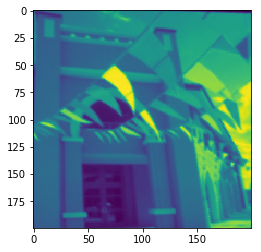

In [8]:
MSEpix,MSEcorp,Matrix,T=Recover_Transformation(g_img3,g_img4)
plt.imsave('./task1/results/mecca2_transformed.jpg'.format(0),T)

x: 1 y: 2
x: 193 y: 2
x: 3 y: 197
x: 198 y: 194
x: 26 y: 1
x: 194 y: 47
x: 6 y: 147
x: 151 y: 197
Matrix [[  1.0979252    0.16409934 -27.710154  ]
 [ -0.35248348   1.287331     9.87724   ]]
Mean Square Error pixel 90.64665
Mean square of corresponding points 2518.5


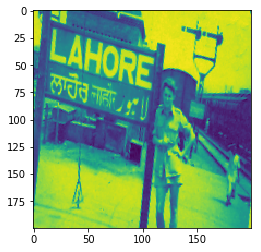

In [9]:
MSEpix,MSEcorp,Matrix,T=Recover_Transformation(g_img5,g_img6)
plt.imsave('./task1/results/station2_transformed.jpg'.format(0),T)

# Task 2

In [2]:
t2img1=cv2.imread('./task2/dataset/badshahiNew.JPG')
t2img2=cv2.imread('./task2/dataset/badshahiOld.JPG')
t2img3=cv2.imread('./task2/dataset/faisalMashidEvening.PNG')
t2img4=cv2.imread('./task2/dataset/faisalMashidNight.PNG')
t2img5=cv2.imread('./task2/dataset/qlibNew.JPG')
t2img6=cv2.imread('./task2/dataset/qlibOld2.JPG')
t2img7=cv2.imread('./task2/dataset/test1.JPG')
t2img8=cv2.imread('./task2/dataset/test2.JPG')

In [3]:
def Image_points(image):
    points=[]
    def click_event(event, x, y, flags, params):
        if event==cv2.EVENT_RBUTTONDOWN: 
            print('x:',x, 'y:', y) 
            points.append([x,y])
            
            font = cv2.FONT_HERSHEY_SIMPLEX 
            #imS = cv2.resize(image, (200, 200)) 
            #cv2.putText(image, str(x) + ',' + str(y), (x,y), font,   1, (255, 0, 0), 2)
            cv2.imshow('image', image) 
  
  
    #imS = cv2.resize(image, (200, 200)) 
    cv2.imshow('image', image) 
    cv2.setMouseCallback('image', click_event) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows()
    return points

#points=Image_points(t2img1)
def Sorting_All_points(p):
    sort_arr = np.zeros((4, 2), dtype="float32")
    s = np.sum(p, axis=1)
    sort_arr[0] = p[np.argmin(s)]
    sort_arr[2] = p[np.argmax(s)]
    diff = np.diff(p, axis=1)
    sort_arr[1] = p[np.argmin(diff)]
    sort_arr[3] = p[np.argmax(diff)]

    return sort_arr




# #  Register Image

x: 195 y: 2
x: 818 y: 2
x: 156 y: 444
x: 832 y: 446
x: 3 y: 2
x: 353 y: 4
x: 2 y: 384
x: 356 y: 385
[ 1.84581651e+00 -3.76602087e-02  1.78093299e+02 -1.96444595e-03
  1.16122851e+00 -1.11248946e+00  1.41480686e-07  4.86192591e-08]


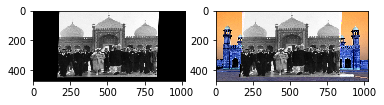

In [34]:
def RegisterImages(ImageNew,ImageOld):
    width1,height1,base1=ImageNew.shape
    width2,height2,base2=ImageOld.shape
    points1=Image_points(ImageNew)
    points2=Image_points(ImageOld)

    pts1=Sorting_All_points(points1)
    pts2=np.float32([[0,0],[height2,0],[height2,width2],[0,height2]])
    
    A = np.array([[points2[0][0], points2[0][1], 1, 0, 0, 0,-points2[0][0]*points1[0][0],-points2[0][1]*points1[0][1]], 
    [0, 0, 0,points2[0][0], points2[0][1], 1,-points2[0][0]*points1[0][0],-points2[0][1]*points1[0][1]],
    [points2[1][0], points2[1][1], 1, 0, 0, 0,-points2[1][0]*points1[1][0],-points2[1][1]*points1[1][1]],
    [0, 0, 0,points2[1][0], points2[1][1], 1,-points2[1][0]*points1[1][0],-points2[1][1]*points1[1][1]],
    [points2[2][0], points2[2][1], 1, 0, 0, 0,-points2[2][0]*points1[2][0],-points2[2][1]*points1[2][1]],
    [0, 0, 0,points2[2][0], points2[2][1], 1,-points2[2][0]*points1[2][0],-points2[2][1]*points1[2][1]],
    [points2[3][0], points2[3][1], 1, 0, 0, 0,-points2[3][0]*points1[3][0],-points2[3][1]*points1[3][1]],
    [0, 0, 0,points2[3][0], points2[3][1], 1,-points2[3][0]*points1[3][0],-points2[3][1]*points1[3][1]]
    ])
    B=np.array([points1[0][0],points1[0][1],points1[1][0],points1[1][1],points1[2][0],points1[2][1],points1[3][0],points1[3][1]])
    
    
    AT=A.transpose()
    ATB = np.dot(AT,B) 
    ATA=np.dot(AT,A)
    ATAinv=np.linalg.inv(ATA)
    Matrix=np.dot(ATAinv,ATB)
    print(Matrix)
    M =np.array([[ Matrix[0],Matrix[1],Matrix[2]],[Matrix[3] , Matrix[4] , Matrix[5] ],[Matrix[6],Matrix[7],1]],dtype=np.float32)
    #print(Mat)
    Transformed_img=cv2.warpPerspective(ImageOld,M,(height1,width1),flags=cv2.INTER_LINEAR)
    plt.imshow(Transformed_img)
    Masking = np.zeros(ImageNew.shape, dtype=np.uint8)
    Region_of_interest = np.int32(pts1)
    cv2.fillConvexPoly(Masking, Region_of_interest, (255, 255, 255))
    Masking = cv2.bitwise_not(Masking)
    masked_image = cv2.bitwise_and(ImageNew, Masking)
    Registeration_img = cv2.bitwise_or(Transformed_img, masked_image)
    plt.subplot(1, 2, 1), plt.imshow(Transformed_img)
    plt.subplot(1, 2, 2), plt.imshow(Registeration_img)
    plt.show() 
    return Registeration_img
Registeration_img=RegisterImages(t2img1,t2img2)

plt.imsave('./task2/results/badshahi_registered.jpg'.format(0),Registeration_img)

 

x: 106 y: 91
x: 496 y: 77
x: 151 y: 278
x: 495 y: 265
x: 1 y: 1
x: 449 y: 2
x: 1 y: 141
x: 449 y: 141
[ 8.18754566e-01  1.59973837e-01  1.16443542e+02 -3.18991852e-02
  1.34573474e+00  8.91051722e+01 -5.06131246e-07  6.13425499e-06]


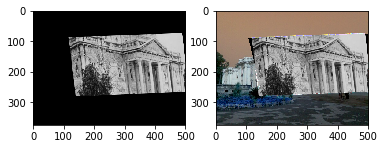

In [36]:
Registeration_img=RegisterImages(t2img5,t2img6)
plt.imsave('./task2/results/qlib_registered.jpg'.format(0),Registeration_img)


x: 2 y: 222
x: 199 y: 225
x: 4 y: 524
x: 209 y: 522
x: 3 y: 0
x: 150 y: 2
x: 2 y: 237
x: 151 y: 238
[ 1.35800695e+00  2.53343796e-02 -3.40752884e+00 -9.50703971e-03
  1.26639033e+00  2.22961369e+02  1.66060189e-07 -2.28638038e-08]


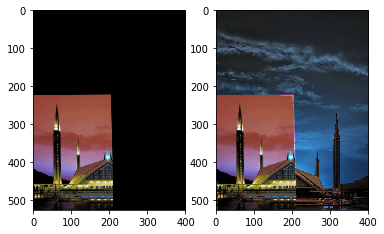

In [42]:
w1,h1,c1=t2img3.shape
w2,h2,c2=t2img4.shape
R5=cv2.resize(t2img3,(h1//2,w1//2),3)
R6=cv2.resize(t2img4,(h2//2, w2//2),3)
Registeration_img=RegisterImages(R5,R6)
plt.imsave('./task2/results/faisalMasjid_registered.jpg'.format(0),Registeration_img)

x: 7 y: 166
x: 926 y: 158
x: 10 y: 692
x: 929 y: 682
x: 2 y: 3
x: 611 y: 2
x: 3 y: 408
x: 612 y: 404
[ 1.50904978e+00  3.68759535e-03  3.96805672e+00 -9.43364510e-03
  1.30112246e+00  1.61641399e+02  3.63340916e-09 -1.07344989e-08]


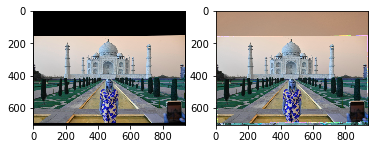

In [39]:
w1,h1,c1=t2img7.shape
w2,h2,c2=t2img8.shape
R5=cv2.resize(t2img7,(h1//4,w1//4),3)
R6=cv2.resize(t2img8,(h2//4, w2//4),3)
Registeration_img=RegisterImages(R5,R6)
plt.imsave('./task2/results/test_registered.jpg'.format(0),Registeration_img)

# Task3

In [5]:
t3img1Set1=cv2.imread('./task3/dataset/Set1/image1.JPG')
t3img2Set1=cv2.imread('./task3/dataset/Set1/image2.JPG')
t3img1Set2=cv2.imread('./task3/dataset/Set2/image1.JPG')
t3img2Set2=cv2.imread('./task3/dataset/Set2/image2.JPG')
t3img3Set2=cv2.imread('./task3/dataset/Set2/image3.JPG')
t3img1Set3=cv2.imread('./task3/dataset/Set3/image1.JPG')
t3img2Set3=cv2.imread('./task3/dataset/Set3/image2.JPG')
t3img3Set3=cv2.imread('./task3/dataset/Set3/image3.JPG')
t3img4Set3=cv2.imread('./task3/dataset/Set3/image4.JPG')
t3img5Set3=cv2.imread('./task3/dataset/Set3/image5.JPG')
t3img1Set4=cv2.imread('./task3/dataset/Set4/image1.JPG')
t3img2Set4=cv2.imread('./task3/dataset/Set4/image2.JPG')
t3img3Set4=cv2.imread('./task3/dataset/Set4/image3.JPG')


In [6]:
def Random_Three_points(Image_one,Image_two):
    height,width=Image_one.shape
    height1,width1=Image_two.shape
    x1 = random.randint(0,width)
    y1 = random.randint(0,height)
    x2 = random.randint(0,width)
    y2 = random.randint(0,height)
    x3 = random.randint(0,width)
    y3 = random.randint(0,height)
    x11 = random.randint(0,width)
    y11 = random.randint(0,height)
    x12 = random.randint(0,width)
    y12 = random.randint(0,height)
    x13 = random.randint(0,width)
    y13 = random.randint(0,height)
    return x1,y1,x2,y2,x3,y3,x11,y11,x12,y12,x13,y13
    
def Transformation_TwoImages(Image_one,Image_two):
    height,width=Image_one.shape
    height1,width1=Image_two.shape
    x1,y1,x2,y2,x3,y3,x11,y11,x12,y12,x13,y13=Random_Three_points(Image_one,Image_two)
    A = np.array([[x1, y1, 1, 0, 0, 0],[0, 0, 0,x1,y1,1],[x2,y2,1,0,0,0],[0,0,0,x2,y2,1],[x3,y3,1,0,0,0],[0,0,0,x3,y3,1]])
    B = np.array([x11, y11,x12, y12,x13, y13])
    AT=A.transpose()
    ATB = np.dot(AT,B) 
    ATA=np.dot(AT,A)
    ATAinv=np.linalg.inv(ATA)
    M=np.dot(ATAinv,ATB)
    Matrix =np.array([[ M[0],M[1],M[2]],[M[3] , M[4] , M[5] ]],dtype=np.float32)
    print("Matrix",Matrix)
    T=cv2.warpAffine(Image_one, Matrix , (width1, height1))
    return T
    

In [7]:
def Image_Stiching(ImageOne,ImageTwo):
    g_t2img1=cv2.cvtColor(ImageOne,cv2.COLOR_RGB2GRAY)
    g_t2img2=cv2.cvtColor(ImageTwo,cv2.COLOR_RGB2GRAY)
    height,weight = g_t2img1.shape
    sift=cv2.SIFT_create()
    keypoint1, descriptor1 = sift.detectAndCompute(g_t2img2,None)
    keypoint2, descriptor2 = sift.detectAndCompute(g_t2img1,None)
    sift_img=cv2.drawKeypoints(g_t2img1,keypoint1,g_t2img2)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptor1,descriptor2,k=2)
    #print(matches)
    near_match = []
    for m,n in matches:
        NNDR=m.distance/n.distance
        if NNDR < 0.8:
            near_match.append(m)
    p1=np.zeros((len(near_match),2),dtype=np.float32)
    p2=np.zeros((len(near_match),2),dtype=np.float32)
    #T=Transformation_TwoImages(ImageOne,ImageTwo)
    ImageMatch = cv2.drawMatchesKnn(ImageOne,keypoint1,ImageTwo,keypoint2,matches,None)
    for i,match in enumerate(near_match):
        p1[i,:]=keypoint1[match.queryIdx].pt
        p2[i,:]=keypoint2[match.trainIdx].pt
    h,mask=cv2.findHomography(p1,p2,cv2.RANSAC,5)
    width,height,c=ImageOne.shape
    #print(width,height)
    #plt.imshow(ImageMatch)
    pts = np.float32([ [0,0],[0,height-1],[weight-1,height-1],[weight-1,0] ]).reshape(-1,1,2)
    Transformed_image = cv2.perspectiveTransform(pts,h)
    Line_img = cv2.polylines(g_t2img2,[np.int32(Transformed_image)],True,255,3, cv2.LINE_AA)
    #plt.imshow(Line_img)
    Transformed_image = cv2.warpPerspective(ImageOne,h,(ImageTwo.shape[1] + ImageOne.shape[1], ImageTwo.shape[0]))
    Transformed_image[0:ImageTwo.shape[0],0:ImageTwo.shape[1]] = ImageTwo
    #plt.subplot(1, 2, 1), plt.imshow(Line_img)
    #plt.subplot(1, 2, 2), plt.imshow(Transformed_image)
    return sift_img,ImageMatch,Line_img,Transformed_image
    

# Task 3 Set # 01 (2 images)

In [8]:
sift_img,ImageMatch,Line_img,Transformed_image=Image_Stiching(t3img1Set1,t3img2Set1)
plt.imsave('./task3/result/Set1/Set1_featurePoints.jpg'.format(0),sift_img)
plt.imsave('./task3/result/Set1/Set1_matches.jpg'.format(0),ImageMatch)
plt.imsave('./task3/result/Set1/Set1_bestMatches.jpg'.format(0),Line_img)
plt.imsave('./task3/result/Set1/Set1_panorama.jpg'.format(0),Transformed_image)

# Task 3 Set # 02 (3 images)

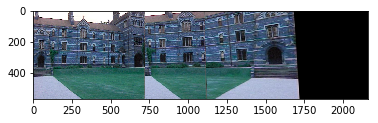

In [107]:
def Image_StichingThreeImages(ImageOne,ImageTwo,ImageThree):
    sift_img,ImageMatch,Line_img,Transformed_image=Image_Stiching(ImageOne,ImageTwo)
    sift_img,ImageMatch,Line_img,Transformed_image=Image_Stiching(Transformed_image,ImageThree)
    plt.imshow(Transformed_image)

    return sift_img,ImageMatch,Line_img,Transformed_image
    
sift_img,ImageMatch,Line_img,Transformed_image=Image_StichingThreeImages(t3img1Set2,t3img2Set2,t3img3Set2)
plt.imsave('./task3/result/Set2/Set2_featurePoints.jpg'.format(0),sift_img)
plt.imsave('./task3/result/Set2/Set2_matches.jpg'.format(0),ImageMatch)
plt.imsave('./task3/result/Set2/set2_bestMatches.jpg'.format(0),Line_img)
plt.imsave('./task3/result/Set2/Set2_panorama.jpg'.format(0),Transformed_image)

# Task 3 Set # 03 (4 images)

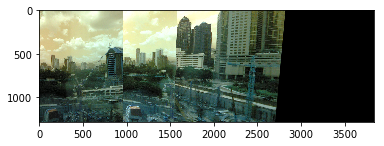

In [113]:
def Image_StichingFourImages(ImageOne,ImageTwo,ImageThree,ImageFour):
    sift_img,ImageMatch,Line_img,Transformed_image=Image_Stiching(ImageOne,ImageTwo)
    sift_img,ImageMatch,Line_img,Transformed_image=Image_Stiching(Transformed_image,ImageThree)
    FourImagessift_img,ImageMatch,Line_img,Transformed_image=Image_Stiching(Transformed_image,ImageFour)
    plt.imshow(Transformed_image)
    return sift_img,ImageMatch,Line_img,Transformed_image
    
sift_img,ImageMatch,Line_img,Transformed_image=Image_StichingFourImages(t3img1Set3,t3img2Set3,t3img3Set3,t3img4Set3)

# Task 3 Set # 03 (5 images)

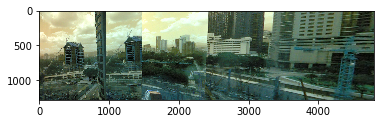

In [108]:
def Image_StichingFiveImages(ImageOne,ImageTwo,ImageThree,ImageFour,ImageFive):
    sift_img,ImageMatch,Line_img,Transformed_image=Image_Stiching(ImageOne,ImageTwo)
    sift_img,ImageMatch,Line_img,Transformed_image=Image_Stiching(Transformed_image,ImageThree)
    sift_img,ImageMatch,Line_img,Transformed_image=Image_Stiching(Transformed_image,ImageFour)
    sift_img,ImageMatch,Line_img,Transformed_image=Image_Stiching(Transformed_image,ImageFive)
    plt.imshow(Transformed_image)

    return sift_img,ImageMatch,Line_img,Transformed_image
sift_img,ImageMatch,Line_img,Transformed_image=Image_StichingFiveImages(t3img1Set3,t3img2Set3,t3img3Set3,t3img4Set3,t3img5Set3)
plt.imsave('./task3/result/Set3/Set3_featurePoints.jpg'.format(0),sift_img)
plt.imsave('./task3/result/Set3/Set3_matches.jpg'.format(0),ImageMatch)
plt.imsave('./task3/result/Set3/set3_bestMatches.jpg'.format(0),Line_img)
plt.imsave('./task3/result/Set3/Set3_panorama.jpg'.format(0),Transformed_image)

# Task 3 Set # 04 (3 images)

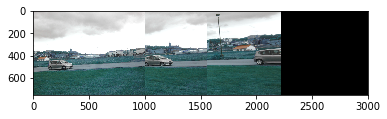

In [110]:
sift_img,ImageMatch,Line_img,Transformed_image=Image_StichingThreeImages(t3img1Set4,t3img2Set4,t3img3Set4)
plt.imshow(Transformed_image)
plt.imsave('./task3/result/Set4/Set4_featurePoints.jpg'.format(0),sift_img)
plt.imsave('./task3/result/Set4/Set4_matches.jpg'.format(0),ImageMatch)
plt.imsave('./task3/result/Set4/set4_bestMatches.jpg'.format(0),Line_img)
plt.imsave('./task3/result/Set4/Set4_panorama.jpg'.format(0),Transformed_image)

# Task 3 New Set # 05 (2 images)

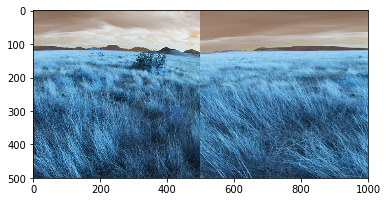

In [111]:
t3img1Set5=cv2.imread('./task3/dataset/Set5/image1.JPG')
t3img2Set5=cv2.imread('./task3/dataset/Set5/image2.JPG')
t3img1Set5=cv2.resize(t3img1Set5,(500,500),3)
t3img2Set5=cv2.resize(t3img2Set5,(500,500),3)
sift_img,ImageMatch,Line_img,Transformed_image=Image_Stiching(t3img1Set5,t3img2Set5)
plt.imshow(Transformed_image)
plt.imsave('./task3/result/Set5/Set5_featurePoints.jpg'.format(0),sift_img)
plt.imsave('./task3/result/Set5/Set5_matches.jpg'.format(0),ImageMatch)
plt.imsave('./task3/result/Set5/set5_bestMatches.jpg'.format(0),Line_img)
plt.imsave('./task3/result/Set5/Set5_panorama.jpg'.format(0),Transformed_image)

# Task 3 New Set No 6 (4 images)

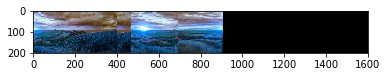

In [114]:
t3img1Set6=cv2.imread('./task3/dataset/Set6/image1.JPG')
t3img2Set6=cv2.imread('./task3/dataset/Set6/image2.JPG')
t3img3Set6=cv2.imread('./task3/dataset/Set6/image3.JPG')
t3img4Set6=cv2.imread('./task3/dataset/Set6/image4.JPG')
t3img1Set6=cv2.resize(t3img1Set6,(400,200),3)
t3img2Set6=cv2.resize(t3img2Set6,(400,200),3)
t3img3Set6=cv2.resize(t3img3Set6,(400,200),3)
t3img4Set6=cv2.resize(t3img4Set6,(400,200),3)
sift_img,ImageMatch,Line_img,Transformed_image=Image_StichingFourImages(t3img1Set6,t3img2Set6,t3img3Set6,t3img4Set6)
plt.imshow(Transformed_image)
plt.imsave('./task3/result/Set6/Set6_featurePoints.jpg'.format(0),sift_img)
plt.imsave('./task3/result/Set6/Set6_matches.jpg'.format(0),ImageMatch)
plt.imsave('./task3/result/Set6/set6_bestMatches.jpg'.format(0),Line_img)
plt.imsave('./task3/result/Set6/Set6_panorama.jpg'.format(0),Transformed_image)